In [1]:
import pandas as pd
import os
import glob
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# The path to data
data_dir = "data"

# Get a list of all CSV files in the directory
all_csv_files = glob.glob(os.path.join(data_dir, "*.csv"))
print(f"Found {len(all_csv_files)} CSV files in directory {data_dir}")

# Select only the first 20 CSV files
csv_files = all_csv_files[0:1]
print(f"Processing only the first 2 files")

# Create output file for combined data
combined_file = "combined_data_34.csv"

# Initialize file headers (first time only)
header_saved = False

# Process each CSV file in chunks
for file in csv_files:
    print(f"Processing file: {file}")
    try:
        # Calculate total rows for progress tracking
        total_rows = sum(1 for _ in open(file, 'r'))
        print(f"Total rows in {file}: {total_rows}")
        
        # Process the file in chunks of 10,000 rows
        chunk_size = 10000
        chunk_count = 0
        
        for chunk in pd.read_csv(file, chunksize=chunk_size):
            chunk_count += 1
            print(f"Processing chunk {chunk_count} ({chunk_count*chunk_size}/{total_rows} rows)")
            
            # Add source file column
            chunk['source_file'] = os.path.basename(file)
            
            # Save to output file
            # First time we write the header, then we append without headers
            chunk.to_csv(combined_file, mode='a', header=not header_saved, index=False)
            
            # Set flag that headers are saved
            if not header_saved:
                header_saved = True
                
    except Exception as e:
        print(f"ERROR processing {file}: {e}")

print(f"Combined data saved to: {combined_file}")

Found 2 CSV files in directory data
Processing only the first 2 files
Processing file: data\part-00020-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
Total rows in data\part-00020-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv: 237152
Processing chunk 1 (10000/237152 rows)
Processing chunk 2 (20000/237152 rows)
Processing chunk 3 (30000/237152 rows)
Processing chunk 4 (40000/237152 rows)
Processing chunk 5 (50000/237152 rows)
Processing chunk 6 (60000/237152 rows)
Processing chunk 7 (70000/237152 rows)
Processing chunk 8 (80000/237152 rows)
Processing chunk 9 (90000/237152 rows)
Processing chunk 10 (100000/237152 rows)
Processing chunk 11 (110000/237152 rows)
Processing chunk 12 (120000/237152 rows)
Processing chunk 13 (130000/237152 rows)
Processing chunk 14 (140000/237152 rows)
Processing chunk 15 (150000/237152 rows)
Processing chunk 16 (160000/237152 rows)
Processing chunk 17 (170000/237152 rows)
Processing chunk 18 (180000/237152 rows)
Processing chunk 19 (190000/237152 rows)
Proces

In [36]:
df = pd.read_csv('combined_data_34.csv')
df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,1.200551e+06,1.200551e+06,1.200551e+06,1.200551e+06,1.200551e+06,1.200551e+06,1.200551e+06,1.200551e+06,1.200551e+06,1.200551e+06,...,1.200551e+06,1.200551e+06,1.200551e+06,1.200551e+06,1.200551e+06,1.200551e+06,1.200551e+06,1.200551e+06,1.200551e+06,1.200551e+06
mean,5.644550e+00,7.640669e+04,9.073716e+00,6.636106e+01,8.986074e+03,8.986074e+03,2.699687e-06,8.622957e-02,2.071424e-01,9.028021e-02,...,1.247769e+02,3.334489e+01,1.247940e+02,8.318965e+07,9.498855e+00,1.312588e+01,4.712311e+01,3.071904e+04,9.645356e-02,1.415216e+02
std,2.579088e+02,4.595041e+05,8.956477e+00,1.405495e+01,9.920627e+04,9.920627e+04,7.985889e-04,2.807029e-01,4.052586e-01,2.865829e-01,...,2.414248e+02,1.603857e+02,2.414317e+02,1.704093e+07,8.188788e-01,8.636331e+00,2.268369e+02,3.284999e+05,2.330667e-01,2.105983e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.090269e+00,2.090269e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.582553e+01,1.582553e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75%,1.050356e-01,2.961400e+02,1.460000e+01,6.400000e+01,1.187078e+02,1.187078e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.404614e+01,3.719096e-01,5.406000e+01,8.334399e+07,9.500000e+00,1.039661e+01,5.059213e-01,1.344216e+00,8.000000e-02,1.415500e+02
max,6.423508e+04,9.905298e+06,4.700000e+01,2.550000e+02,8.388608e+06,8.388608e+06,5.902649e-01,1.000000e+00,1.000000e+00,1.000000e+00,...,9.231150e+03,8.290916e+03,6.034000e+03,1.676394e+08,1.500000e+01,1.308595e+02,1.172513e+04,7.713750e+07,1.000000e+00,2.446000e+02


In [2]:
def applySMOTE(original_dataset_file_location: str, output_filename: str):
    # Lendo dataset
    data = pd.read_csv(original_dataset_file_location)

    # Lendo X (features) e y (classes)
    X = data.drop('label', axis=1)
    y_str = data['label']

    # Transformando y para valor numérico
    le = LabelEncoder()
    y = le.fit_transform(y_str)

    # Aplicando SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)

    # Transformando y de volta para strings
    y_smote_original_labels = le.inverse_transform(y_smote)
    y_smote_series = pd.Series(y_smote_original_labels, name='label')

    # Criando DF com dataset com SMOTE
    smote_DF = pd.concat([X_smote, y_smote_series], axis=1)

    # Salvando dataset
    smote_DF.to_csv(output_filename, index=False)

applySMOTE('data/part-00020-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 'out.csv')

Contando as distribuições de todas as labels...
Processando chunk 1...
Processando chunk 2...
Processando chunk 3...
Processando chunk 4...
Processando chunk 5...
Processando chunk 6...
Processando chunk 7...
Processando chunk 8...
Processando chunk 9...
Processando chunk 10...
Processando chunk 11...
Processando chunk 12...
Processando chunk 13...
Processando chunk 14...
Processando chunk 15...
Processando chunk 16...
Processando chunk 17...
Processando chunk 18...
Processando chunk 19...
Processando chunk 20...
Processando chunk 21...
Processando chunk 22...
Processando chunk 23...
Processando chunk 24...
Processando chunk 25...

Total de labels distintas: 34
Total de amostras: 1245080
Número de labels únicas: 34


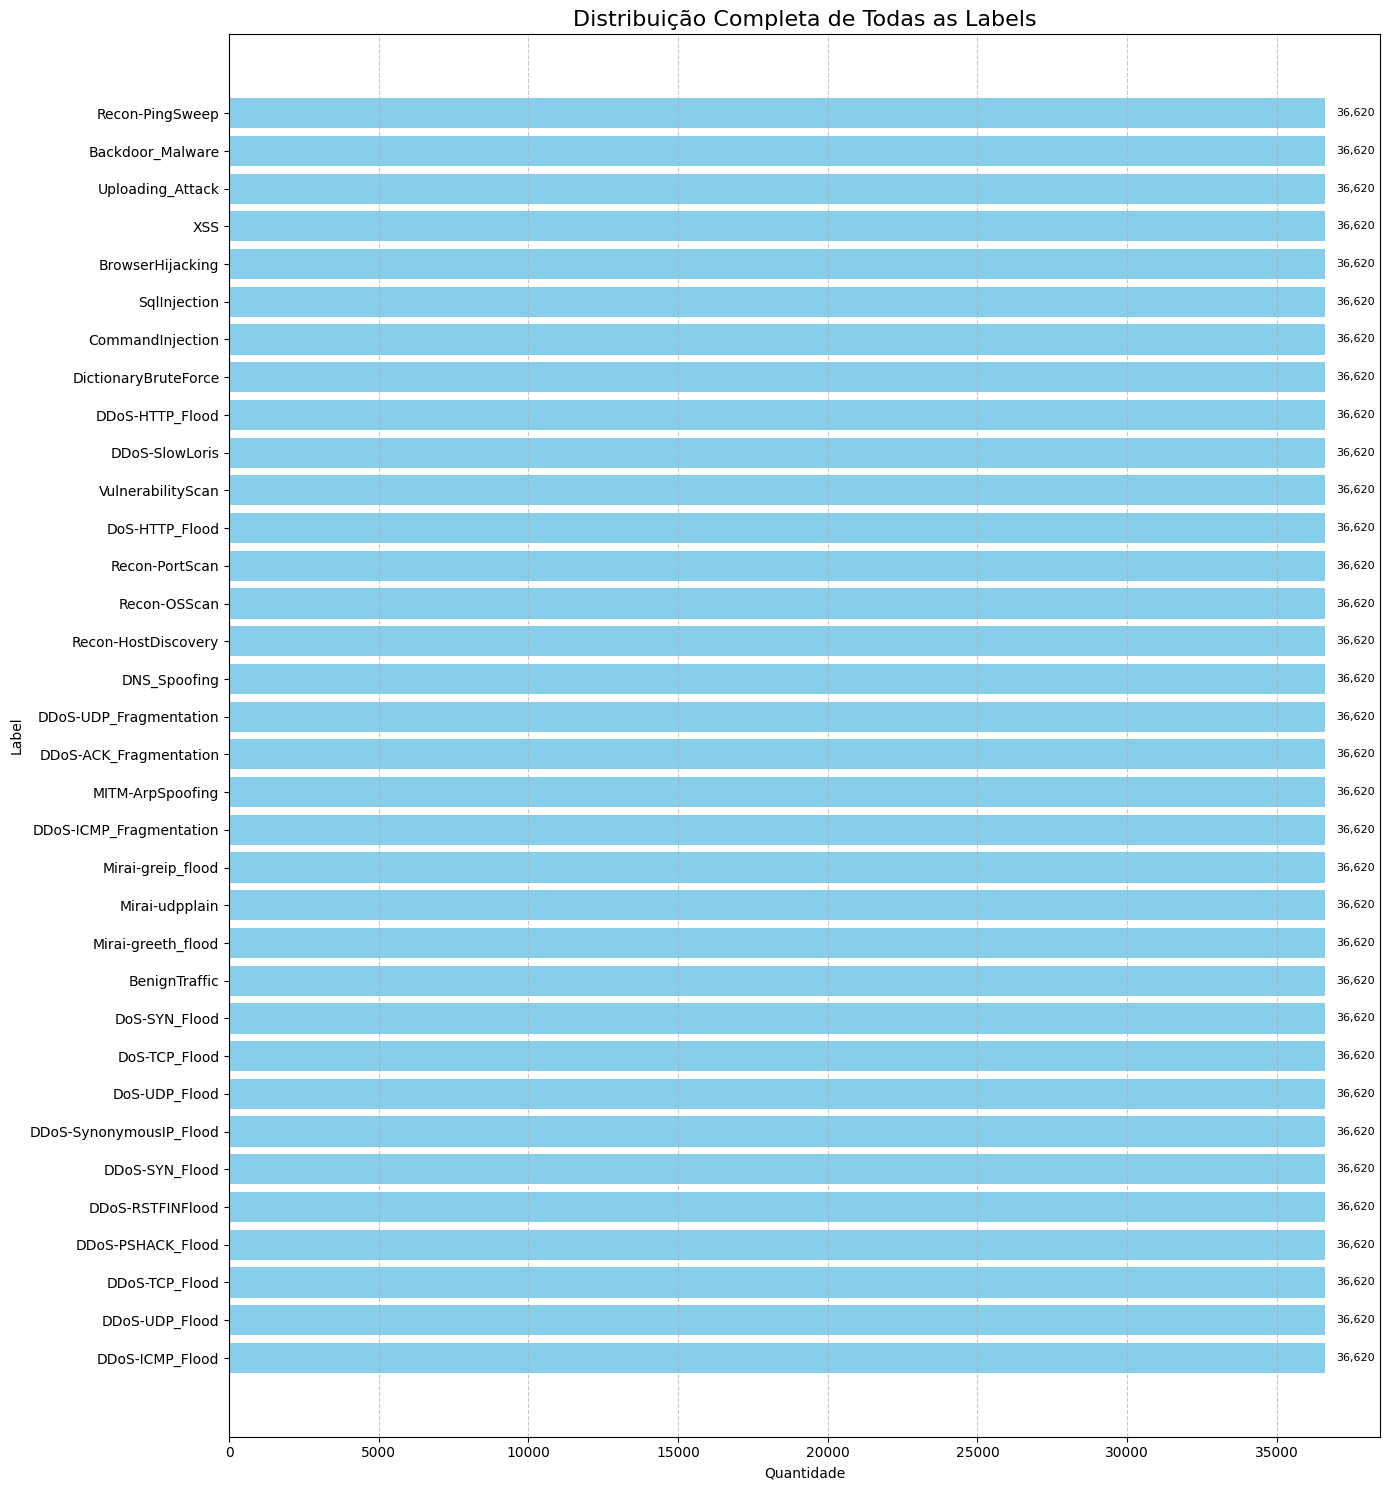

In [3]:
# Caminho para o arquivo combinado
combined_file = "out.csv"

# Ler o arquivo em chunks para contar as labels
label_counts = {}

# Processa o arquivo em chunks devido ao tamanho
chunk_size = 50000
chunk_count = 0

print("Contando as distribuições de todas as labels...")

# Ler arquivo em chunks para evitar problemas de memória
for chunk in pd.read_csv(combined_file, chunksize=chunk_size):
    chunk_count += 1
    print(f"Processando chunk {chunk_count}...")
    
    # Contar as labels neste chunk
    chunk_labels = chunk['label'].value_counts().to_dict()
    
    # Adicionar ao contador total
    for label, count in chunk_labels.items():
        if label in label_counts:
            label_counts[label] += count
        else:
            label_counts[label] = count

# Converter para um DataFrame para facilitar a visualização
label_df = pd.DataFrame({
    'Label': list(label_counts.keys()),
    'Count': list(label_counts.values())
})

# Ordenar do mais frequente para o menos frequente
label_df = label_df.sort_values('Count', ascending=False).reset_index(drop=True)

# Calcular porcentagens
total = label_df['Count'].sum()
label_df['Percentage'] = (label_df['Count'] / total * 100).round(2)

# Mostrar informações sobre todas as labels
print(f"\nTotal de labels distintas: {len(label_df)}")
print(f"Total de amostras: {total}")

# Verificar quantas labels existem para determinar a melhor visualização
num_labels = len(label_df)
print(f"Número de labels únicas: {num_labels}")

# Ajustar dinamicamente o tamanho da figura com base no número de labels
if num_labels <= 20:
    fig_height = 10
    rotation = 45
elif num_labels <= 50:
    fig_height = 15
    rotation = 90
else:
    fig_height = 20
    rotation = 90

# Criar gráfico de barras para TODAS as labels
plt.figure(figsize=(14, fig_height))

# Usar barh (barras horizontais) se houver muitas classes
if num_labels > 30:
    # Inverta a ordem para que as mais frequentes fiquem no topo
    plot_df = label_df.sort_values('Count')
    
    # Gráfico de barras horizontais para melhor visualização com muitas classes
    bars = plt.barh(y=plot_df['Label'], width=plot_df['Count'], color='skyblue')
    
    # Adicionar valores nas barras
    for bar in bars:
        width = bar.get_width()
        label_x = width + (max(label_df['Count']) * 0.01)
        plt.text(label_x, bar.get_y() + bar.get_height()/2, f'{int(width):,}', 
                 va='center', fontsize=8)
    
    plt.xlabel('Quantidade')
    plt.ylabel('Label')
    plt.title('Distribuição Completa de Todas as Labels', fontsize=16)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
else:
    # Gráfico de barras verticais para poucas classes
    bars = plt.bar(label_df['Label'], label_df['Count'], color='skyblue')
    
    # Adicionar valores nas barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5, f'{int(height):,}', 
                ha='center', va='bottom', fontsize=8)
    
    plt.xlabel('Label')
    plt.ylabel('Quantidade')
    plt.title('Distribuição Completa de Todas as Labels', fontsize=16)
    plt.xticks(rotation=rotation, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('all_labels_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [38]:
# class 8 classification
def change_label(df):
  df.label.replace(['DDoS-ICMP_Flood','DDoS-UDP_Flood','DDoS-TCP_Flood','DDoS-PSHACK_Flood','DDoS-SYN_Flood','DDoS-RSTFINFlood','DDoS-SynonymousIP_Flood','DDoS-ICMP_Fragmentation','DDoS-UDP_Fragmentation','DDoS-ACK_Fragmentation','DDoS-HTTP_Flood','DDoS-SlowLoris'],'DDos',inplace=True)
  df.label.replace(['DoS-UDP_Flood','DoS-TCP_Flood','DoS-SYN_Flood','DoS-HTTP_Flood'],'DoS',inplace=True)      
  df.label.replace(['Recon-HostDiscovery','Recon-OSScan','Recon-PortScan','Recon-PingSweep','VulnerabilityScan'],'Recon',inplace=True)
  df.label.replace(['MITM-ArpSpoofing','DNS_Spoofing'],'Spoofing',inplace=True)
  df.label.replace(['DictionaryBruteForce'],'BruteForce',inplace=True)
  df.label.replace(['BrowserHijacking','XSS','Uploading_Attack','SqlInjection','CommandInjection','Backdoor_Malware'],'Web-based',inplace=True)
  df.label.replace(['Mirai-greeth_flood','Mirai-udpplain','Mirai-greip_flood'],'Mirai',inplace=True)
  df.label.replace(['BenignTraffic'],'BENIGN',inplace=True)
change_label(df)


In [39]:
df['label'].unique()


array(['DDos', 'DoS', 'BENIGN', 'Mirai', 'Web-based', 'Spoofing', 'Recon',
       'BruteForce'], dtype=object)

In [40]:
df.to_csv('conbined_data_8.csv', index=False)

In [41]:
def change_label_to_two_classes(df):
    # A classe BENIGN permanece como está
    df.label.replace(['BENIGN'], 'BENIGN', inplace=True)
    
    # Todas as outras labels que não são 'BENIGN' são transformadas em 'ATACK'
    df.label = df.label.apply(lambda x: 'ATACK' if x != 'BENIGN' else 'BENIGN')

# Aplicando a transformação
change_label_to_two_classes(df)

In [42]:
df['label'].unique()

array(['ATACK', 'BENIGN'], dtype=object)

In [43]:
df.to_csv('conbined_data_2.csv', index=False)